In [3]:
import pandas as pd
import numpy as np

dep = pd.read_csv('Depression_sanity_1000.csv')
nonM = pd.read_csv('non_mental_health_sanity_1000.csv')

In [4]:
dep

,subreddit,title,author,text_content,date
0,depression,I don’t know what’s happening.,hdr1988,I’ve been depressed most of my life. \nMost of...,2019-03-01 10:37:59
1,depression,Plz answer plz I need help,dvmixic505,So I want to talk about post vacation depressi...,2018-06-21 09:24:44
2,depression,Suggestions for songs to listen to when nearin...,Khyati_88,Do you guys have suggestions for any mood upli...,2019-06-17 22:14:04
3,depression,"Ye olde ""how you doing?""",UCsecurity,Don't you hate it when people ask how your doi...,2019-12-06 03:30:01
4,depression,Evolution,bonwijs,I have been depressed and suicidal for quite a...,2017-01-12 21:08:33
...,...,...,...,...,...
995,depression,im just so lonely,Borgrar,i feel like such an outcast at times. I feel l...,2017-09-14 01:24:30
996,depression,Short Rant,anon_needs_help_,My mom always expects there to be a reason beh...,2020-07-29 01:21:03
997,depression,People always tell you to quit all things in l...,DasEvoli,seriously should I just lay in my bed?,2019-08-12 06:32:46
998,depression,Anyone else feel bad when they're having a goo...,klb000,There are days where I don't really think abou...,2019-03-28 21:30:40


In [5]:
# stemming 관련 함수

from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()

def change_pos_form(pos):
    if 'NN' in pos[0][1]:
        new_pos = 'n'
    elif 'V' in pos[0][1]:
        new_pos = 'v'
    elif 'RB' in pos[0][1]:
        new_pos = 'r'
    elif 'JJ' in pos[0][1]:
        new_pos = 'a'
    else:
        new_pos = ''
    return new_pos

def lemmatize(word,form):
    if form !='':
        return n.lemmatize(word,form)
    else:
        return n.lemmatize(word)

In [6]:
#전처리 관련

import nltk
import re
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = list(set(stopwords.words('english')))
def w_cleansing(List):
    corpus = []
    for i in List:
        url_pattern ='https?://\S+|#([0-9a-zA-Z]*)'
        i = re.sub(pattern=url_pattern, repl=' ', string = i)
        i = i.replace('\r','').replace('\n','')
        text = re.sub('[-=+,#/\?:^$.”@*\"“※~&%ㆍ!』\\‘|\(\)\[\]\<\>`…》;’]', '', i.lower())
        new_text = ''
        for j in word_tokenize(text):
            if j not in stop_words:
                new_text = new_text +lemmatize(j,change_pos_form(nltk.pos_tag([j])))+' '
        corpus.append(new_text)
    return corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leesangyun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# 제목 + 내용
dep_mix = []
for i in (dep['title'] + ' '+dep['text_content']):
    dep_mix.append(i)
    
nonM_mix=[]
for i in (nonM['title']+' '+nonM['text_context']):
    nonM_mix.append(i)

In [8]:
dep_cleansing = w_cleansing(dep_mix)
nonM_cleansing = w_cleansing(nonM_mix)

In [9]:
# nonM의 라벨을 0 dep의 라벨을 1로 설정하는 과정
nonM_data = []
for i in nonM_cleansing:
    empty=[]
    empty.append(i)
    empty.append(0)
    nonM_data.append(empty)

dep_data = []
for i in dep_cleansing:
    empty = []
    empty.append(i)
    empty.append(1)
    dep_data.append(empty)

In [10]:
from sklearn.model_selection import train_test_split

nonM_text = [i[0] for i in nonM_data]
nonM_label = [i[1] for i in nonM_data]
dep_text = [i[0] for i in dep_data]
dep_label = [i[1] for i in dep_data]
sanity_test = pd.DataFrame({"text":nonM_text+dep_text,"label":nonM_label+dep_label})
def split_train_test(sanity_test, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(sanity_test['text'], 
                                                        sanity_test['label'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test


X_train, X_test, Y_train, Y_test = split_train_test(sanity_test)

Value counts for Train sentiments
1    705
0    696
Name: label, dtype: int64
Value counts for Test sentiments
0    306
1    295
Name: label, dtype: int64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
   index                                               text
0    655  wim hof breathing meditation hi 'm post say ro...
1    874  without germ good place thats feel bad germany...
2    256  short answer exam roughly many question put ex...
3   1567  yesterday realise much avoid reality n't know ...
4     68  get fatherinlaw new year think christmas weste...


In [23]:
X_train

,index,text
0,655,wim hof breathing meditation hi 'm post say ro...
1,874,without germ good place thats feel bad germany...
2,256,short answer exam roughly many question put ex...
3,1567,yesterday realise much avoid reality n't know ...
4,68,get fatherinlaw new year think christmas weste...
...,...,...
1396,1798,ok ive delete almost social medium think ive b...
1397,1231,im exactly suicidal dont quite live weird feel...
1398,282,anyone want try online teach anyone interested...
1399,1399,fuck hate brain thats really say hate


In [11]:
all_words = [lemmatize(word,change_pos_form(nltk.pos_tag([word]))) for text in X_train['text'].values for word in word_tokenize(text)]

In [12]:
len(all_words)

133392

In [13]:
#사용된 단어들의 수
vocab_dic = {i:all_words.count(i) for i in all_words}

In [14]:
words = []
num = []
for i in vocab_dic:
    words.append(i)
    num.append(vocab_dic[i])
data_num = pd.DataFrame({"words":words,"num":num})
count = pd.DataFrame(data_num['num'].value_counts())
count



,num
1,6622
2,1416
3,723
4,457
5,292
...,...
1699,1
1315,1
759,1
683,1


X_train에 사용된 약 14만개의 단어 중 1번만 사용된 단어는 6656개 2번만 사용된 단어는 1461개이다. 

In [44]:
num = []
for i in vocab_dic:
    num.append(vocab_dic[i])


print("사용 단어들의 평균 사용 수: ",np.mean(num))
print("사용 단어들의 사용 수의 중간값: ",np.median(num))

사용 단어들의 평균 사용 수:  11.611411911703456
사용 단어들의 사용 수의 중간값:  1.0


## W2V

In [30]:
# train,test를 각각 word로 tokenize
Train = []
for i in X_train['text'].values:
    empty = []
    for j in word_tokenize(i):
        origin = lemmatize(j,change_pos_form(nltk.pos_tag([j])))
        if j not in stop_words:
            empty.append(origin)
    Train.append(empty)

Test = []
for i in X_test['text'].values:
    empty = []
    for j in word_tokenize(i):
        origin = lemmatize(j,change_pos_form(nltk.pos_tag([j])))
        if j not in stop_words:
            empty.append(origin)
    Test.append(empty)

In [202]:
# train,test 예시
Train[0:2],Test[0:2]

([['ive',
   'sit',
   'room',
   'long',
   'depression',
   'whole',
   'life',
   'kid',
   'never',
   'knew',
   'enjoy',
   'anything',
   'watch',
   'life',
   'pa',
   'blooming',
   'everything',
   'didnt',
   'know',
   'reach',
   'joy',
   'young',
   'kid',
   'molest',
   'caretaker',
   'take',
   'year',
   'therapy',
   'im',
   'sure',
   'many',
   'even',
   'think',
   'color',
   'whole',
   'world',
   'shade',
   'could',
   'never',
   'bright',
   'others',
   'played',
   'chess',
   'strategy',
   'game',
   'distract',
   'dove',
   'fantasy',
   'anything',
   'let',
   'escape',
   'mind',
   'didnt',
   'trust',
   'anyone',
   'didnt',
   'talk',
   'parent',
   'anything',
   'even',
   'still',
   'problem',
   'communicate',
   'express',
   'everything',
   'want',
   'say',
   'sister',
   'ive',
   'spent',
   'long',
   'wrap',
   'world',
   'shell',
   'build',
   'remain',
   'sane',
   'life',
   'pas',
   'thats',
   'control',
   'dont',


In [32]:
# cross validation - 중간값이 1이라 대신 평균값(11)을 포함하여 30까지 올려가며 비교
from gensim.models import Word2Vec
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

mean_list = []
test_list = []
for i in range(30):
    print('i = ',i)
    model = Word2Vec(Train, min_count = i, size = 100, window = 5, sg = 1) 
    # 단어 벡터를 이용해 문서를 벡터로 변환하는 과정
    x_train = []
    for sen in Train:
        empty = []
        for token in sen:
            if token in model.wv.vocab:
                empty.append(model.wv[token])
            else:
                empty.extend(np.zeros((1,100))) #training에는 있지만 w2v vocab에는 없는 단어의 벡터는 np.zeros로 대체
        x_train.append(np.mean(empty,axis=0))
    
    classifier = SVC(kernel = 'linear',C = 1)
    # cross validation 하는 부분
    score = cross_val_score(classifier,x_train,Y_train['label'].values,cv = 10)
    mean_list.append(np.mean(score)) # 10 fold 결과 평균값을 mean_list에 저장
    
    # train으로 학습후 테스트 데이터로 예측해보는 부분
    classifier.fit(x_train,Y_train['label'])
    x_test = []
    for sen in Test:
        empty = []
        for token in sen:
            if token in sen:
                if token in model.wv.vocab:
                    empty.append(model.wv[token])
                else:
                    empty.extend(np.zeros((1,100)))
        x_test.append(np.mean(empty,axis=0))
    correct = 0
    for i in range(len(x_test)):
        if(classifier.predict([x_test[i]]) == Y_test['label'][i]):
            correct = correct + 1
    test_list.append(correct/len(x_test))
       
    
mean_list,test_list

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29


([0.8336727456940223,
  0.8393819655521784,
  0.8443617021276595,
  0.8357953394123607,
  0.8457953394123606,
  0.8443667679837892,
  0.846499493414387,
  0.847933130699088,
  0.8493667679837893,
  0.8486474164133739,
  0.8472289766970619,
  0.850081053698075,
  0.8572188449848024,
  0.8486524822695035,
  0.8543617021276596,
  0.8522239108409322,
  0.8450810536980751,
  0.8486474164133739,
  0.8472289766970619,
  0.8422340425531916,
  0.8486626139817629,
  0.8507902735562312,
  0.8507953394123607,
  0.8500911854103343,
  0.8572137791286728,
  0.8507953394123607,
  0.8450911854103342,
  0.8550759878419452,
  0.8515248226950355,
  0.8443718338399189],
 [0.8086522462562395,
  0.8103161397670549,
  0.8069883527454242,
  0.8252911813643927,
  0.8286189683860233,
  0.8236272878535774,
  0.8252911813643927,
  0.8402662229617305,
  0.8252911813643927,
  0.8369384359400999,
  0.8336106489184693,
  0.831946755407654,
  0.8369384359400999,
  0.8252911813643927,
  0.826955074875208,
  0.8252911813

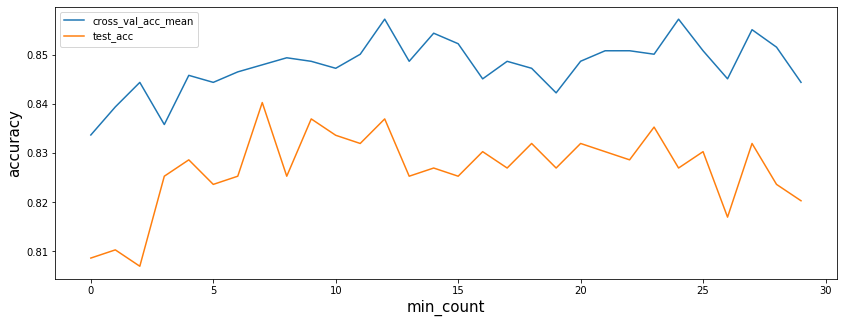

In [36]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14,5)
i_num = [i for i in range(0,30)]
plt.plot(i_num,mean_list)
plt.plot(i_num,test_list)
plt.xlabel('min_count',fontsize = 15)
plt.ylabel('accuracy',fontsize =15)
plt.legend(['cross_val_acc_mean','test_acc'])
plt.show()

## One hot encoding

In [20]:
Y_test['label'][0]

1

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

mean_list = []
test_list = []
vect = CountVectorizer(stop_words="english")
x_train = vect.fit_transform(X_train['text']).toarray()
x_test = vect.transform(X_test['text']).toarray()

classifier = SVC(kernel = 'linear',C = 1)
# cross validation 하는 부분
score = cross_val_score(classifier,x_train,Y_train['label'].values,cv = 10)
print(score)
print()
classifier.fit(x_train,Y_train['label'])
TP = 0 #dep예측, 실제값 dep
TN = 0 #nonM예측, 실제값 nonM
FP = 0 #nonM예측, 실제값 dep
FN = 0 #dep예측, 실제값 nonM
for i in range(len(x_test)):
    if(classifier.predict([x_test[i]]) == Y_test['label'][i]):
        if(Y_test['label'][i] == 1):
            TP = TP + 1
        else:
            TN = TN + 1
    elif(classifier.predict([x_test[i]]) != Y_test['label'][i]):
        if(Y_test['label'][i] == 1):
            FP = FP + 1
        else:
            FN = FN + 1
    else:
        print(classifier.predict[x_test[i]],Y_test['label'][i])

print("dep으로 예측 및 맞춘 횟수: ",TP)
print("nonM으로 예측 및 맞춘 횟수: ",TN)
print("dep으로 예측 및 틀린 횟수(nonM이 실제값)",FN)
print("nonM으로 예측 및 틀린 횟수(dep이 실제값)",FP)

a = TP+TN+FN+FP
accuracy = (TP + TN)/(TP+TN+FN+FP)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print("총 데이터:",a)
print("accuracy: ",accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)


[0.84397163 0.87142857 0.80714286 0.85714286 0.87857143 0.86428571
 0.88571429 0.85714286 0.87142857 0.85714286]

dep으로 예측 및 맞춘 횟수:  258
nonM으로 예측 및 맞춘 횟수:  246
dep으로 예측 및 틀린 횟수(nonM이 실제값) 60
nonM으로 예측 및 틀린 횟수(dep이 실제값) 37
총 데이터: 601
accuracy:  0.8386023294509152
precision:  0.8745762711864407
recall:  0.8113207547169812
f1_score:  0.8417618270799347


In [24]:
import numpy as np
np.mean(score)

0.8593971631205675

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

mean_list = []
test_list = []
vect = TfidfVectorizer()
x_train = vect.fit_transform(X_train['text']).toarray()
x_test = vect.transform(X_test['text']).toarray()

classifier = SVC(kernel = 'linear',C = 1)
# cross validation 하는 부분
score = cross_val_score(classifier,x_train,Y_train['label'].values,cv = 10)
print(score)
print()
classifier.fit(x_train,Y_train['label'])
TP = 0 #dep예측, 실제값 dep
TN = 0 #nonM예측, 실제값 nonM
FP = 0 #nonM예측, 실제값 dep
FN = 0 #dep예측, 실제값 nonM
for i in range(len(x_test)):
    if(classifier.predict([x_test[i]]) == Y_test['label'][i]):
        if(Y_test['label'][i] == 1):
            TP = TP + 1
        else:
            TN = TN + 1
    elif(classifier.predict([x_test[i]]) != Y_test['label'][i]):
        if(Y_test['label'][i] == 1):
            FP = FP + 1
        else:
            FN = FN + 1
    else:
        print(classifier.predict[x_test[i]],Y_test['label'][i])

print("dep으로 예측 및 맞춘 횟수: ",TP)
print("nonM으로 예측 및 맞춘 횟수: ",TN)
print("dep으로 예측 및 틀린 횟수(nonM이 실제값)",FN)
print("nonM으로 예측 및 틀린 횟수(dep이 실제값)",FP)

a = TP+TN+FN+FP
accuracy = (TP + TN)/(TP+TN+FN+FP)
precision = (TP)/(TP+FP)
recall = (TP)/(TP+FN)
f1_score = 2 * (precision * recall)/(precision + recall)

print("총 데이터:",a)
print("accuracy: ",accuracy)
print("precision: ",precision)
print("recall: ",recall)
print("f1_score: ",f1_score)



[0.90780142 0.91428571 0.85714286 0.93571429 0.89285714 0.9
 0.92142857 0.92142857 0.92857143 0.86428571]

dep으로 예측 및 맞춘 횟수:  268
nonM으로 예측 및 맞춘 횟수:  264
dep으로 예측 및 틀린 횟수(nonM이 실제값) 42
nonM으로 예측 및 틀린 횟수(dep이 실제값) 27
총 데이터: 601
accuracy:  0.8851913477537438
precision:  0.9084745762711864
recall:  0.864516129032258
f1_score:  0.8859504132231405


In [26]:
np.mean(score)

0.9043515704154002